# Семинар 7. Практика. Отбор признаков

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Данные

Данные: https://www.kaggle.com/c/bioresponse/data

In [2]:
data = pd.read_csv('bioresponse.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(3751, 1777)

In [4]:
from sklearn.cross_validation import train_test_split
X, X_test, y, y_test = train_test_split(data.iloc[:, 1:].values, data.iloc[:, 0].values, test_size=0.3)

In [5]:
X.shape

(2625, 1776)

[]

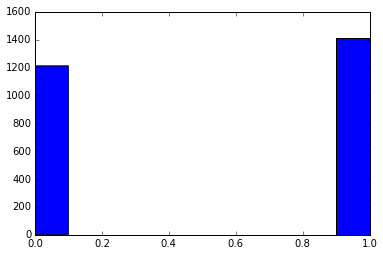

In [6]:
plt.hist(y)
plt.plot()

## Модели без отбора признаков

In [7]:
from sklearn import linear_model, ensemble, metrics

In [8]:
clf = linear_model.LogisticRegression(C=0.1)
clf.fit(X, y)
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.833415147265


In [9]:
clf = linear_model.LogisticRegression(penalty='l1', C=1)
clf.fit(X, y)
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print np.sum(clf.coef_ != 0)

0.822615708275
460


In [10]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.875798482723


In [11]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=6)
clf.fit(X, y)
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.884760295805


## Отбор признаков

#### Признаки с низкой дисперсией

In [12]:
low_var_idx = np.std(X, axis=0).argsort()

In [13]:
low_var_idx[:10]

array([ 71, 301, 822, 398, 800, 566, 631, 570, 858, 736])

In [14]:
np.std(X, axis=0)[low_var_idx][:50]

array([ 0.        ,  0.00322318,  0.00325238,  0.00436436,  0.00440223,
        0.00730571,  0.00760465,  0.00843812,  0.00872572,  0.00974738,
        0.01031258,  0.01061659,  0.01062366,  0.01103189,  0.01125727,
        0.0114324 ,  0.01156215,  0.01159247,  0.01172044,  0.01228897,
        0.01256305,  0.0128993 ,  0.01300208,  0.01302236,  0.01330661,
        0.01366924,  0.01377513,  0.01403092,  0.01414298,  0.01420022,
        0.01427463,  0.01502841,  0.01524947,  0.01541593,  0.01571087,
        0.01576284,  0.01591197,  0.0167016 ,  0.01689724,  0.01701592,
        0.01715649,  0.01754967,  0.01758065,  0.0175929 ,  0.01760167,
        0.01775386,  0.01779511,  0.01785508,  0.01786958,  0.01832585])

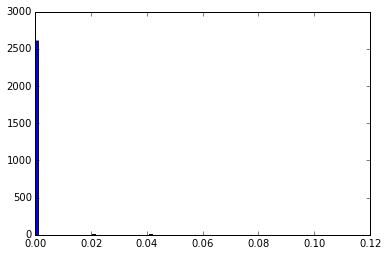

In [15]:
plt.hist(X[:, low_var_idx[3]], bins=100)
plt.show()

In [16]:
np.sum(X[:, low_var_idx[3]] > 0)

21

In [17]:
np.sum(X[:, low_var_idx[10]] > 0)

16

In [18]:
quals = []
for i in range(0, 1776, 10):
    clf = linear_model.LogisticRegression(C=0.1)
    clf.fit(X[:, low_var_idx[i:]], y)
    q = metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:, low_var_idx[i:]])[:, 1])
    quals.append(q)
    print i, q

0 0.833408772154
10 0.833383271707
20 0.833402397042
30 0.833383271707
40 0.833360958817
50 0.833306770368
60 0.833265332143
70 0.833227081474
80 0.833227081474
90 0.83319201836
100 0.833204768583
110 0.833211143695
120 0.833284457478
130 0.833262144588
140 0.833233456585
150 0.833335458371
160 0.833262144588
170 0.833306770368
180 0.833281269922
190 0.833268519699
200 0.833147392579
210 0.833134642356
220 0.833125079689
230 0.833166517914
240 0.833112329466
250 0.833099579243
260 0.833080453908
270 0.83302626546
280 0.8329657019
290 0.83292745123
300 0.8329657019
310 0.832937013898
320 0.832994389902
330 0.833007140125
340 0.832991202346
350 0.832968889456
360 0.832994389902
370 0.833032640571
380 0.832933826342
390 0.832946576565
400 0.832873262782
410 0.832815886778
420 0.832803136555
430 0.83272344766
440 0.832758510774
450 0.832653321433
460 0.832627820987
470 0.832560882315
480 0.832509881423
490 0.832462068086
500 0.832573632539
510 0.83264057121
520 0.832720260105
530 0.8326788

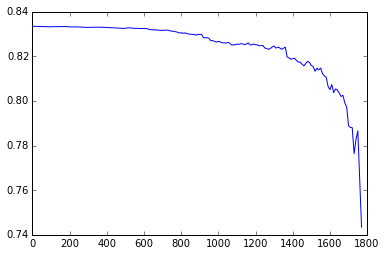

In [19]:
plt.plot(range(0, 1776, 10), quals)
plt.show()

In [20]:
quals = []
for i in range(0, 1776, 10):
    clf = ensemble.RandomForestClassifier(n_estimators=100)
    clf.fit(X[:, low_var_idx[i:]], y)
    q = metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:, low_var_idx[i:]])[:, 1])
    quals.append(q)
    print i, q

0 0.874961749331
10 0.878499936249
20 0.875304411577
30 0.879241042968
40 0.876944409027
50 0.877511793956
60 0.878224212674
70 0.873050809639
80 0.874907560882
90 0.875290067576
100 0.875484508479
110 0.875741106719
120 0.878276807344
130 0.876359492541
140 0.878466466913
150 0.877202601046
160 0.87434973862
170 0.872987058524
180 0.874442177738
190 0.875486102257
200 0.876220833865
210 0.874724276425
220 0.878032959327
230 0.873071528752
240 0.875339474691
250 0.877322134387
260 0.875130689787
270 0.87568054316
280 0.877357197501
290 0.879319138085
300 0.873729759021
310 0.877534106847
320 0.874483615963
330 0.874480428407
340 0.877057567257
350 0.875428726253
360 0.874451740405
370 0.875296442688
380 0.878723065154
390 0.870771707255
400 0.87502231289
410 0.874569679969
420 0.875304411577
430 0.880552722173
440 0.87455374219
450 0.877295040163
460 0.877003378809
470 0.877527731735
480 0.876831250797
490 0.876122019635
500 0.874558523524
510 0.874722682647
520 0.875572166263
530 0.87

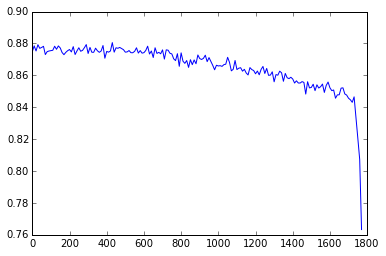

In [21]:
plt.plot(range(0, 1776, 10), quals)
plt.show()

#### Одномерные методы

In [22]:
from sklearn.feature_selection import f_classif

In [23]:
var_imp = f_classif(X, y)[1]
var_imp[np.isnan(var_imp)] = 1
imp_feature_idx = var_imp.argsort()[::-1]

/usr/local/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [71] are constant.
  UserWarning)


In [24]:
imp_feature_idx

array([  71, 1387,  370, ...,  746,  468,   26])

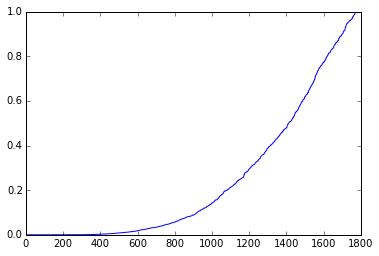

In [25]:
plt.plot(sorted(var_imp))
plt.show()

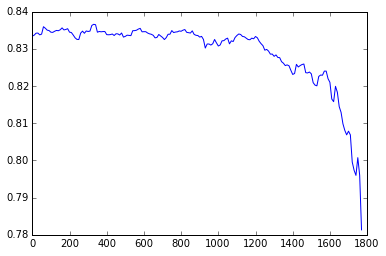

In [26]:
quals = []
for i in range(0, 1776, 10):
    clf = linear_model.LogisticRegression(C=0.1)
    clf.fit(X[:, imp_feature_idx[i:]], y)
    q = metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:, imp_feature_idx[i:]])[:, 1])
    quals.append(q)
plt.plot(range(0, 1776, 10), quals)
plt.show()

In [27]:
quals[-10]

0.80808364146372569

#### Отбор с помощью Lasso

In [28]:
from sklearn.svm import l1_min_c
c_grid = l1_min_c(X, y, loss='log') * np.logspace(0, 3, 100)

In [29]:
c_grid

array([ 0.00273598,  0.0029337 ,  0.00314571,  0.00337304,  0.0036168 ,
        0.00387818,  0.00415844,  0.00445896,  0.0047812 ,  0.00512672,
        0.00549722,  0.00589449,  0.00632046,  0.00677723,  0.007267  ,
        0.00779216,  0.00835528,  0.00895909,  0.00960654,  0.01030078,
        0.01104519,  0.0118434 ,  0.01269929,  0.01361703,  0.01460109,
        0.01565627,  0.01678771,  0.01800091,  0.01930178,  0.02069667,
        0.02219236,  0.02379614,  0.02551582,  0.02735978,  0.029337  ,
        0.0314571 ,  0.03373042,  0.03616802,  0.03878178,  0.04158443,
        0.04458963,  0.04781199,  0.05126723,  0.05497218,  0.05894486,
        0.06320464,  0.06777227,  0.07266998,  0.07792164,  0.08355282,
        0.08959095,  0.09606544,  0.10300782,  0.11045191,  0.11843396,
        0.12699285,  0.13617028,  0.14601092,  0.15656273,  0.16787708,
        0.18000909,  0.19301785,  0.20696671,  0.22192362,  0.23796142,
        0.25515823,  0.27359781,  0.29336996,  0.314571  ,  0.33

In [30]:
n_features = []
quals = []
for c in c_grid:
    clf = linear_model.LogisticRegression(penalty='l1', C=c)
    clf.fit(X, y)
    q = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    quals.append(q)
    n_features.append(np.sum(clf.coef_ > 0))
quals = np.array(quals)
n_features = np.array(n_features)

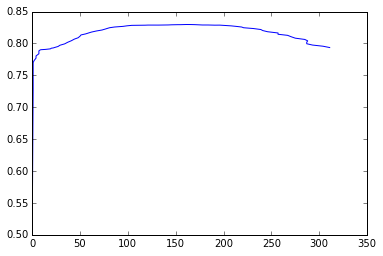

In [31]:
plt.plot(n_features, quals)
plt.show()

In [32]:
quals[n_features <= 100]

array([ 0.5       ,  0.72885694,  0.72885694,  0.72885694,  0.72885694,
        0.72885694,  0.72885694,  0.72885694,  0.72885694,  0.72885694,
        0.72885694,  0.72885694,  0.72885694,  0.72885694,  0.74201836,
        0.74201836,  0.74201836,  0.75316206,  0.75369438,  0.75800236,
        0.75956585,  0.7606305 ,  0.76144651,  0.76240437,  0.76373837,
        0.76660079,  0.76773875,  0.76875877,  0.77009913,  0.77319266,
        0.7770751 ,  0.78043638,  0.78391081,  0.78638276,  0.7876291 ,
        0.78840048,  0.78957988,  0.79022058,  0.79074812,  0.79158963,
        0.79258893,  0.79301288,  0.79397871,  0.79529039,  0.79723639,
        0.79943262,  0.80183284,  0.80436058,  0.80680862,  0.80899209,
        0.81148158,  0.81340048,  0.81508989,  0.81653704,  0.81790131,
        0.81957159,  0.82113668,  0.82290578,  0.82387479,  0.82474181,
        0.82582239,  0.82685197,  0.82768073])

#### Отбор с помощью RandomizedLasso

In [33]:
clf = linear_model.RandomizedLogisticRegression(C=1.0)
clf.fit(X, y)

RandomizedLogisticRegression(C=1.0, fit_intercept=True,
               memory=Memory(cachedir=None), n_jobs=1, n_resampling=200,
               normalize=True, pre_dispatch='3*n_jobs', random_state=None,
               sample_fraction=0.75, scaling=0.5, selection_threshold=0.25,
               tol=0.001, verbose=False)

In [34]:
np.sum(clf.scores_ > 0)

343

In [35]:
imp_feature_idx = clf.scores_.argsort()

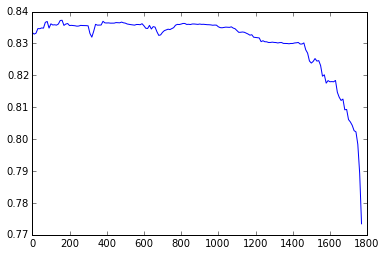

In [36]:
quals = []
for i in range(0, 1776, 10):
    clf = linear_model.LogisticRegression(C=0.1)
    clf.fit(X[:, imp_feature_idx[i:]], y)
    q = metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:, imp_feature_idx[i:]])[:, 1])
    quals.append(q)
plt.plot(range(0, 1776, 10), quals)
plt.show()

In [37]:
quals[-10]

0.80920566109906933

#### Отбор с помощью RandomForest

In [38]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
imp_feature_idx = clf.feature_importances_.argsort()

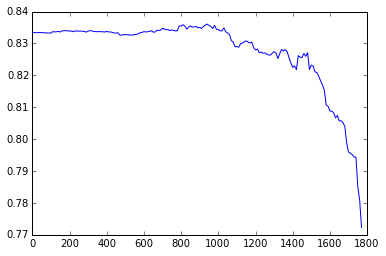

In [40]:
quals = []
for i in range(0, 1776, 10):
    clf = linear_model.LogisticRegression(C=0.1)
    clf.fit(X[:, imp_feature_idx[i:]], y)
    q = metrics.roc_auc_score(y_test, clf.predict_proba(X_test[:, imp_feature_idx[i:]])[:, 1])
    quals.append(q)
plt.plot(range(0, 1776, 10), quals)
plt.show()

In [41]:
quals[-10]

0.80406732117812063

In [42]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

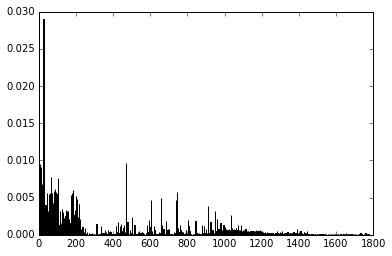

In [43]:
plt.bar(range(1776), clf.feature_importances_)
plt.show()

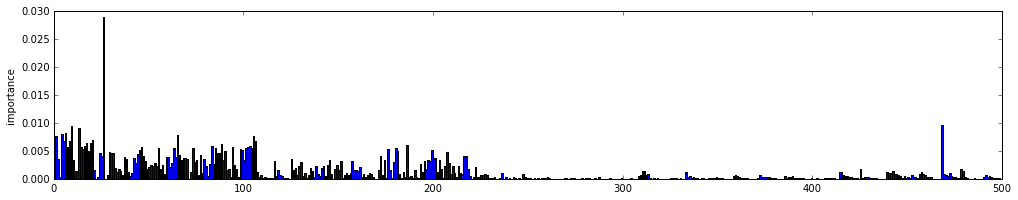

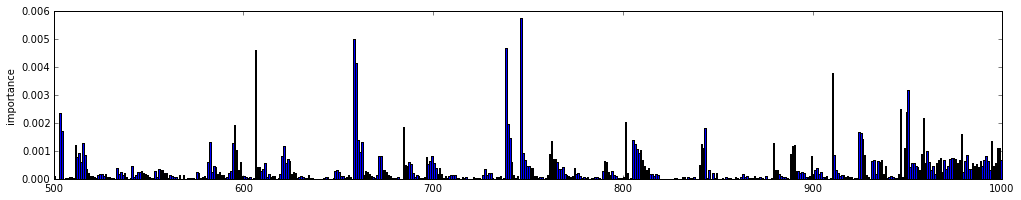

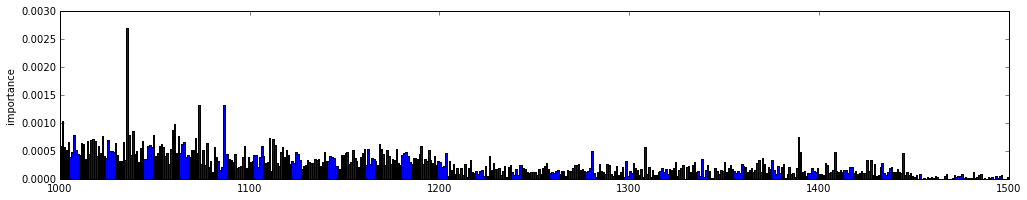

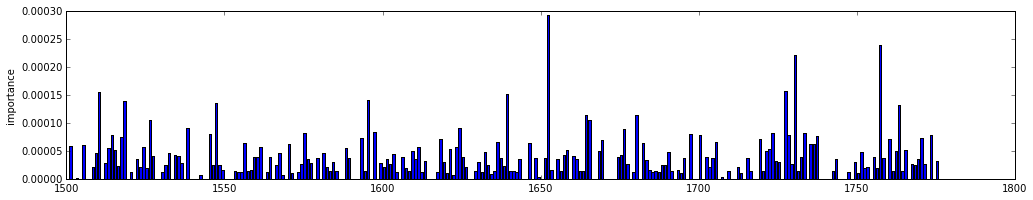

In [44]:
start = 0
step = 500
while start < X.shape[1]:
    sel = np.arange(start, min(start + step, X.shape[1]))
    plt.figure(figsize=(17, 3))
    plt.bar(sel, clf.feature_importances_[sel])
    plt.ylabel('importance')
    start += step

#### Метод главных компонент

In [45]:
from sklearn import decomposition

In [46]:
pca = decomposition.PCA(n_components=100)
X_pca = pca.fit_transform(X, y)
X_pca_test = pca.transform(X_test)

In [47]:
clf = linear_model.LogisticRegression(C=0.1)
clf.fit(X_pca, y)
print metrics.roc_auc_score(y_test, clf.predict_proba(X_pca_test)[:, 1])

0.82184113222


## Более сложный датасет

Данные: https://www.kaggle.com/c/loan-default-prediction

In [48]:
data = pd.read_csv('loan_default.csv')
data.head()

/usr/local/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (135,204,274,417,462) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201,4949,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240,1625,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800,1527,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542,1730,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89,491,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [49]:
data = data.fillna(0)

In [50]:
data.iloc[:, 617]

0           11724173453590999285553430528
1            6391495663130699779035627520
2           36420952401170000260810932224
3           15267506423634001098621059072
4          238204359524660008028924280832
5          479547052714589990280725790720
6         1121640214875899989593589547008
7          522702201956439972801444577280
8          204588615621480008854072721408
9          155457932714040006262139125760
10          48159788498707001853475815424
11         415632267575499996016179937280
12         403096269853729980590432714752
13         299377379493949998941356425216
14         327991368795340015142843711488
15         236959168214440004366995816448
16         424590962704439980417441857536
17         288897822611629983571835355136
18          84504882152402994971078033408
19          81518308747489999133033365504
20          50161351598135003205276270592
21          26805434865300998013199581184
22          14920200030039000833543110656
23          1324712703779799970625

In [51]:
np.unique(data.iloc[:, 617].values).size

104754

In [52]:
np.corrcoef(data.iloc[:, 617].astype(float), data.iloc[:, -1])

array([[  1.00000000e+00,  -9.05167658e-04],
       [ -9.05167658e-04,   1.00000000e+00]])

In [53]:
np.unique(data.iloc[:, 388].values).size

104662

In [54]:
X, X_test, y, y_test = train_test_split(data.iloc[:, 1:-1].values, data.iloc[:, -1].values, test_size=0.3)

In [55]:
X.shape

(73829, 769)

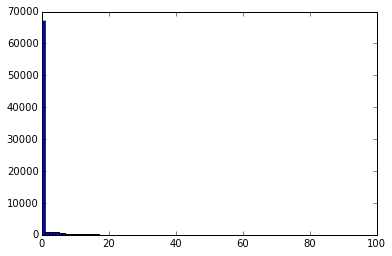

In [56]:
plt.hist(y, bins=100)
plt.show()

In [57]:
y = (y > 0).astype(float)
y_test = (y_test > 0).astype(float)

In [58]:
X = X.astype(float)
X_test = X_test.astype(float)

In [59]:
np.isnan(X).sum()

0

In [60]:
np.max(X)

8.8981077375823995e+41

In [61]:
max_f_val = np.max(X, axis=0)
max_f_val.argsort()

array([753, 759, 758,  32, 757,  34, 756,  35, 755, 692,  30, 668, 762,
        31, 690, 691, 586,  66,  67, 764, 686,  50,  40, 750, 746, 326,
        63, 235, 245, 155, 255, 185, 265, 741, 106, 310, 116, 294,  96,
       175, 318, 195, 165, 126, 225,  86, 302, 635, 584, 585, 508, 714,
        52, 238,  36,  54,  46,  38,  58,  56,  89,  48,  44,  53,  42,
        99,  79,  37,   2, 288, 289, 169, 170, 121, 190, 296, 120, 180,
       119, 287, 188, 297, 178, 179, 295, 189, 661, 160, 218, 239, 240,
       148, 149, 150, 248, 249, 250, 230, 258, 259, 229, 228, 260, 666,
       158, 159, 220, 219, 168, 111,  91, 109,  60, 110, 767, 392,  47,
       393,  43, 394, 395, 396,  29, 401, 402, 403,  19,  18,  17,  16,
        15,  14,  12,  11, 583, 582, 766,  61,  62,  57,  81, 313, 726,
        68,  90, 319, 101, 754, 311, 100,  80, 312, 305, 321, 304, 303,
       320, 607, 631, 633, 632, 506, 713, 736, 605, 419, 482, 346, 127,
       266, 196, 327, 502, 337, 492, 117,  97,  77, 216, 455, 25

In [62]:
max_f_val[684]

634000000000.0

In [63]:
X[:, 617]

array([  1.61240832e+38,   3.17649047e+39,   2.05342125e+39, ...,
         7.90676860e+37,   3.80992663e+39,   2.45861011e+40])

In [64]:
X[np.abs(X) > 100000] = 100000
X_test[np.abs(X_test) > 100000] = 100000

#### Обычная логистическая регрессия


In [65]:
clf = linear_model.LogisticRegression(C=0.1)
clf.fit(X[:1000, :], y[:1000])
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.581326032132


#### Одномерный отбор

In [66]:
var_imp = f_classif(X, y)[1]
var_imp[np.isnan(var_imp)] = 1
imp_feature_idx = var_imp.argsort()[::-1]

/usr/local/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 30  31  32  34  35 668 690 691 692 721 722 726 754] are constant.
  UserWarning)


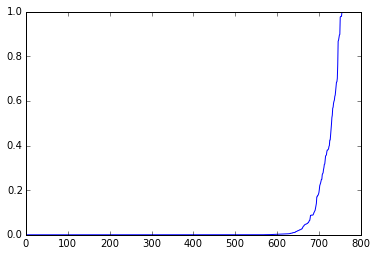

In [67]:
plt.plot(sorted(var_imp))

In [68]:
clf = linear_model.LogisticRegression(C=0.1)
clf.fit(X[:, imp_feature_idx[-10:]], y)
print metrics.roc_auc_score(y_test, 
            clf.predict_proba(X_test[:, imp_feature_idx[-10:]])[:, 1])

0.641804516133


#### Lasso

In [69]:
clf = linear_model.LogisticRegression(penalty='l1', C=0.1)
clf.fit(X[:1000, :], y[:1000])
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print np.sum(clf.coef_ > 0)

0.581819408966
143


#### Random Forest

In [70]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X.astype(float)[:1000, :], y[:1000])
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.585320495981


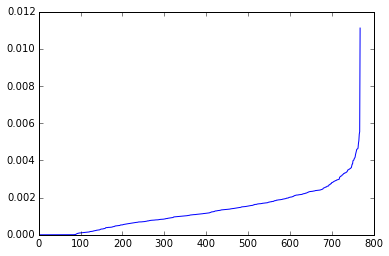

In [71]:
plt.plot(sorted(clf.feature_importances_))
plt.show()